<a href="https://colab.research.google.com/github/Youngkyun-Kwon/Personal-Works/blob/main/Text_Analytics_E_commerce_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Problem**

It is imperative for all businesses to stay abreast of recent trends as well as keep experimenting and launching new products in order to retain the existing customers and attract the new ones. In order to focus their efforts in the right direction, it is necessary to analyze the past and present patterns of customer behavior. Talking about e-commerce websites, it is highly recommended to see how their customers would react towards any new product they launch. 

E-commerce websites do not have the time to go through swathes of customer reviews to identify underperforming and successful products, and what lessons can be learned from these cases. Hence, through text mining, we seek to help the e-commerce website to  quickly and efficiently go through customer reviews, then produce an analysis of which products need more work, and what strategies we can adopt based on successful products.

Our business problem is that an e-commerce company similar to Amazon has received a dataset from which they can select products they wish to add to their inventory. However, they don’t have the time or manpower to analyze such a huge dataset which has around 20000 records. So our team has been called in to conduct text analysis in order to provide recommendations for ideal products, as well as describe how lackluster products can improve.


# **Data Preparation**

In [145]:
#import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [146]:
#importing modules
import pandas as pd
import numpy as np

In [147]:
# Load the dataframe
df = pd.read_csv('/content/drive/MyDrive/portfolio/E-commerce_Review/Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [148]:
# Shape
df.shape
# 23486 rows, 11 columns

(23486, 11)

In [149]:
df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

'Recommended' accounts for 82%, while 'Not recommended' accounts for 18%.

In [150]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Let's remove the 845 rows which had no value in the review text column.

In [151]:
# remove the rows without values in the text column
bool_series = pd.notnull(df['Review Text'])
df = df[bool_series]

Title column contains condensed information of reviews, though many rows have missing values in the column. Therefore, we decided to merge the Title column and Review Text column into a new_text column. 

In [152]:
df['Title'] = df['Title'].fillna('')
df['new_text'] = df['Title'] + ' ' + df['Review Text']

We removed “Unnamed” which indicates index, “Title”, “Review Text” columns.

In [153]:
df.drop(['Unnamed: 0', 'Title', 'Review Text'], axis=1, inplace=True)

In [154]:
df = pd.concat([df, pd.get_dummies(df['Class Name'])], axis=1)

In [155]:
df.columns

Index(['Clothing ID', 'Age', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'new_text', 'Blouses', 'Casual bottoms', 'Chemises',
       'Dresses', 'Fine gauge', 'Intimates', 'Jackets', 'Jeans', 'Knits',
       'Layering', 'Legwear', 'Lounge', 'Outerwear', 'Pants', 'Shorts',
       'Skirts', 'Sleep', 'Sweaters', 'Swim', 'Trend'],
      dtype='object')

# **Explanatory Data Analytics**

In [156]:
df_eda = df.groupby('Recommended IND')['Blouses', 'Casual bottoms', 'Chemises', 'Dresses', 'Fine gauge',
       'Intimates', 'Jackets', 'Jeans', 'Knits', 'Layering', 'Legwear',
       'Lounge', 'Outerwear', 'Pants', 'Shorts', 'Skirts', 'Sleep', 'Sweaters',
       'Swim', 'Trend'].sum()
df_eda

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Blouses,Casual bottoms,Chemises,Dresses,Fine gauge,Intimates,Jackets,Jeans,Knits,Layering,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
Recommended IND,,,,,,,,,,,,,,,,,,,,
0,577.0,0.0,0.0,1197.0,177.0,21.0,107.0,133.0,868.0,16.0,23.0,95.0,60.0,226.0,49.0,143.0,31.0,280.0,68.0,30.0
1,2406.0,1.0,1.0,4948.0,882.0,126.0,576.0,971.0,3758.0,116.0,135.0,574.0,259.0,1124.0,255.0,760.0,183.0,1100.0,264.0,88.0


In [157]:
cols = df_eda.columns

for col in cols:
  print(col, df_eda.loc[1, col]/(df_eda.loc[0, col]+df_eda.loc[1, col]))

Blouses 0.8065705665437479
Casual bottoms 1.0
Chemises 1.0
Dresses 0.8052074857607812
Fine gauge 0.8328611898016998
Intimates 0.8571428571428571
Jackets 0.8433382137628112
Jeans 0.8795289855072463
Knits 0.8123648940769563
Layering 0.8787878787878788
Legwear 0.8544303797468354
Lounge 0.8579970104633782
Outerwear 0.8119122257053292
Pants 0.8325925925925926
Shorts 0.8388157894736842
Skirts 0.8416389811738649
Sleep 0.8551401869158879
Sweaters 0.7971014492753623
Swim 0.7951807228915663
Trend 0.7457627118644068


Compared to the fact that 'Recommended' accounts for 82%, Jeans, Layering, Legwear, Lounge, and Sleep have relatively higher percentages of 'Recommended, while Blouses, Dresses, and Knits which are best seller items have lower percentages. 

It's crucial to find out why the three best sellers have a lower proportion of customer satisfaction. So, let's focus on them.

In [158]:
df = df[['Recommended IND','Class Name', 'new_text']]

In [159]:
# remove any funky characters with a blank
df['new_text'] = df['new_text'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
df['new_text'].head()

0    Absolutely wonderful silky and sexy and comfor...
1    Love this dress its sooo pretty i happened to ...
2    Some major design flaws I had such high hopes ...
3    My favorite buy I love love love this jumpsuit...
4    Flattering shirt This shirt is very flattering...
Name: new_text, dtype: object

In [160]:
# make everything lowercase
df['new_text'] = df['new_text'].str.lower()
print(df['new_text'][0])
print(df['new_text'][1])
print(df['new_text'][2])

absolutely wonderful silky and sexy and comfortable
love this dress its sooo pretty i happened to find it in a store and im glad i did bc i never would have ordered it online bc its petite i bought a petite and am i love the length on me hits just a little below the knee would definitely be a true midi on someone who is truly petite
some major design flaws i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper it c


In [161]:
# let's remove some of the stop words
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords') # download stopwords
print(stopwords.words('english'))

stop = stopwords.words('english') # let's see what they are

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [162]:
# adds a space between selected words
df['new_text'] = df['new_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) 
df.head()

,Recommended IND,Class Name,new_text
0,1,Intimates,absolutely wonderful silky sexy comfortable
1,1,Dresses,love dress sooo pretty happened find store im ...
2,0,Dresses,major design flaws high hopes dress really wan...
3,1,Pants,favorite buy love love love jumpsuit fun flirt...
4,1,Blouses,flattering shirt shirt flattering due adjustab...


In [163]:
# seperate tweets into each class
df_rec=df[df['Recommended IND']==1]
df_norec=df[df['Recommended IND']==0]

In [164]:
df_rec.loc[df_rec['Class Name'] == 'Dresses', 'new_text']

1        love dress sooo pretty happened find store im ...
8        flattering love dress usually get xs runs litt...
9        fun dress im lbs ordered petite make sure leng...
11                      dress perfection pretty flattering
12       perfect find reliant reviews written savvy sho...
                               ...                        
23475    cute dress cute dress waist high sleeves tight...
23477    entrancing im impressed beautiful color combin...
23481    great dress many occasions happy snag dress gr...
23484    cute dress perfect summer parties bought dress...
23485    please make like one dress lovely platinum fem...
Name: new_text, Length: 4948, dtype: object

In [165]:
# select top50 words for each class
rec_dress=pd.Series(' '.join(df_rec.loc[df_rec['Class Name'] == 'Dresses', 'new_text']).split()).value_counts()[:50]
norec_dress=pd.Series(' '.join(df_norec.loc[df_norec['Class Name'] == 'Dresses', 'new_text']).split()).value_counts()[:50]
rec_blouse=pd.Series(' '.join(df_rec.loc[df_rec['Class Name'] == 'Blouses', 'new_text']).split()).value_counts()[:50]
norec_blouse=pd.Series(' '.join(df_norec.loc[df_norec['Class Name'] == 'Blouses', 'new_text']).split()).value_counts()[:50]
rec_Knit=pd.Series(' '.join(df_rec.loc[df_rec['Class Name'] == 'Knits', 'new_text']).split()).value_counts()[:50]
norec_Knit=pd.Series(' '.join(df_norec.loc[df_norec['Class Name'] == 'Knits', 'new_text']).split()).value_counts()[:50]

In [166]:
# convert them to dataframes
rec_dress = pd.DataFrame(rec_dress)
norec_dress = pd.DataFrame(norec_dress)
rec_blouse = pd.DataFrame(rec_blouse)
norec_blouse = pd.DataFrame(norec_blouse)
rec_Knit = pd.DataFrame(rec_Knit)
norec_Knit = pd.DataFrame(norec_Knit)

In [167]:
# renames columns
rec_dress.reset_index(inplace=True)
rec_dress.columns = ['words','fre']
norec_dress.reset_index(inplace=True)
norec_dress.columns = ['words','fre']
rec_blouse.reset_index(inplace=True)
rec_blouse.columns = ['words','fre']
norec_blouse.reset_index(inplace=True)
norec_blouse.columns = ['words','fre']
rec_Knit.reset_index(inplace=True)
rec_Knit.columns = ['words','fre']
norec_Knit.reset_index(inplace=True)
norec_Knit.columns = ['words','fre']
print(rec_dress.head())
print(norec_Knit.head())

   words   fre
0  dress  8952
1   love  2401
2   size  2253
3    fit  1770
4  great  1641
    words  fre
0     top  669
1   shirt  390
2    like  344
3  fabric  296
4   would  271


## **Most common words**

### Dresses

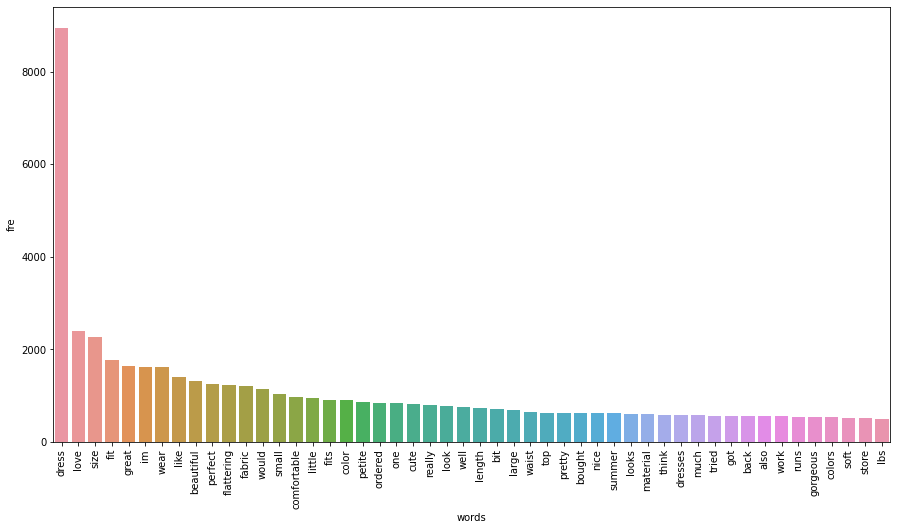

In [168]:
# show a plot of top50 words for Recommended
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
ax = sns.barplot(x=rec_dress['words'], y=rec_dress['fre'], data=rec_dress)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

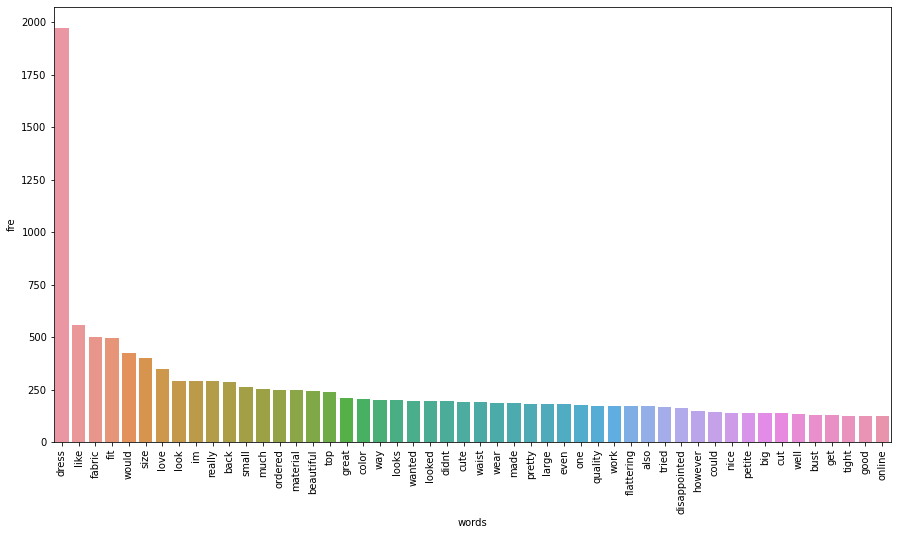

In [169]:
# show a plot of top50 words for Not Recommended
plt.figure(figsize=(15,8))
ax = sns.barplot(x=norec_dress['words'], y=norec_dress['fre'], data=norec_dress)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

### Blouses

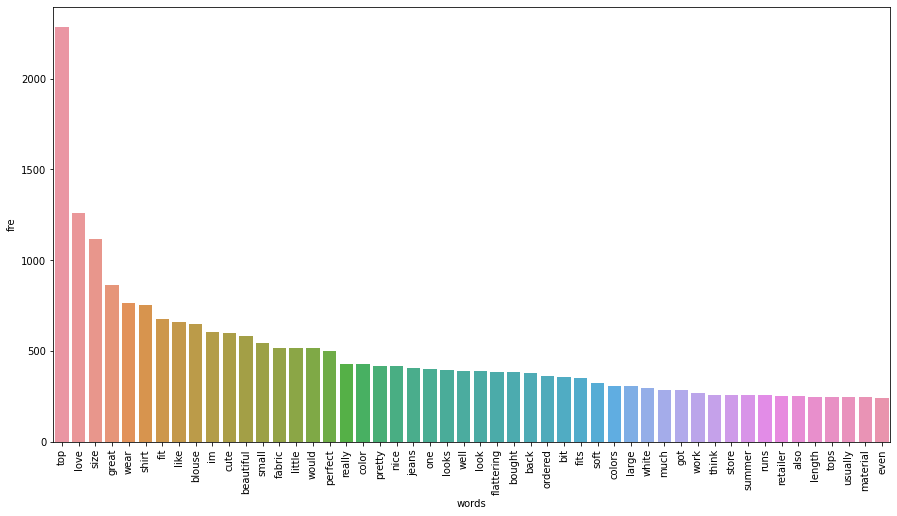

In [170]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x=rec_brouse['words'], y=rec_blouse['fre'], data=rec_blouse)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

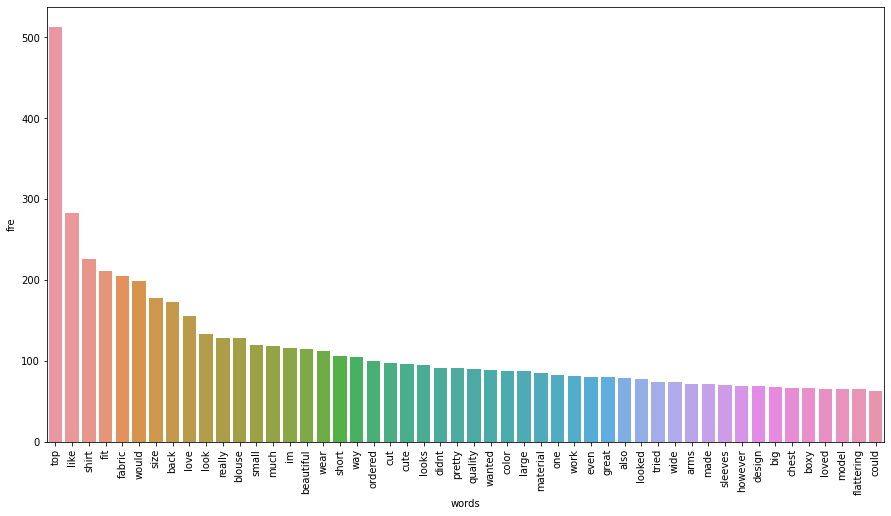

In [171]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x=norec_brouse['words'], y=norec_blouse['fre'], data=norec_blouse)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

### Knits

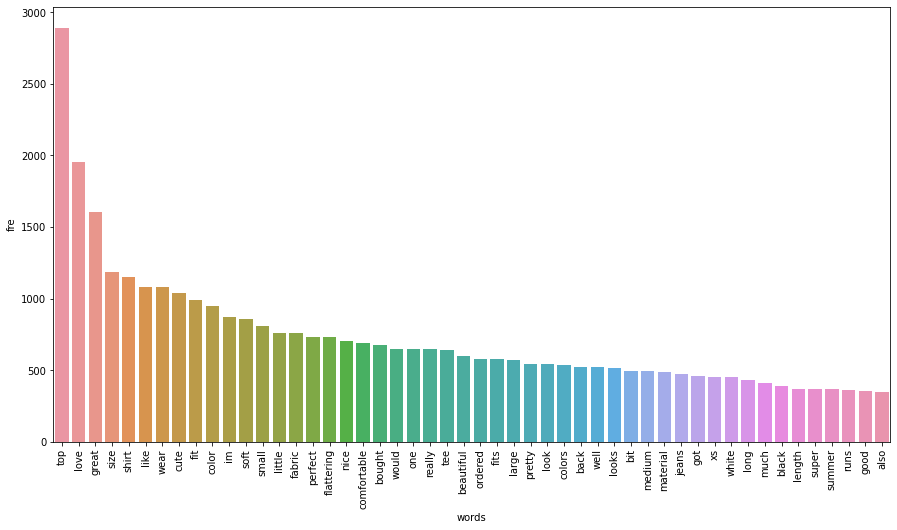

In [172]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x=rec_Knit['words'], y=rec_Knit['fre'], data=rec_Knit)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

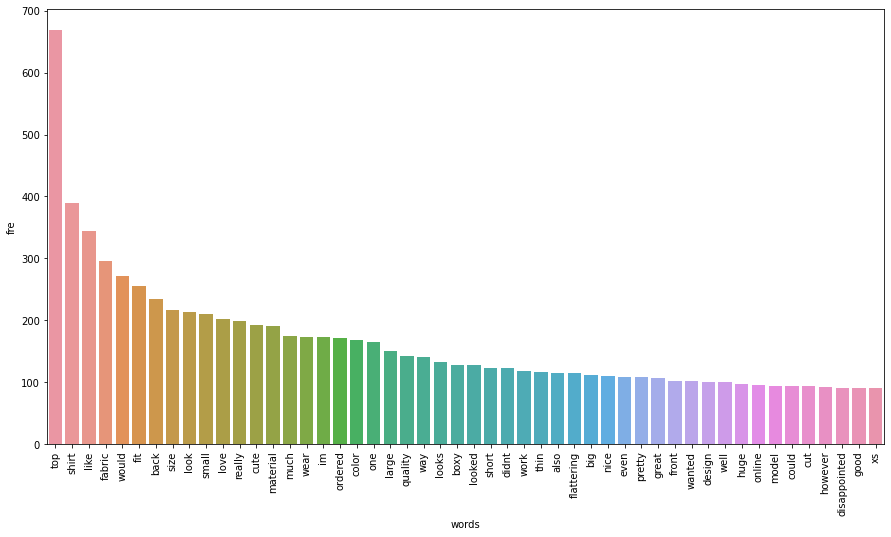

In [173]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x=norec_Knit['words'], y=norec_Knit['fre'], data=norec_Knit)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

## **Word Cloud**

### Dresses

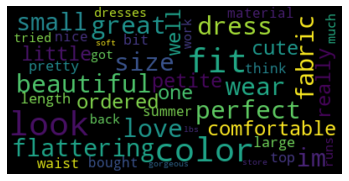

In [174]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(rec_dress['words']))

# # Display the generated image:

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(rec_dress['words']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

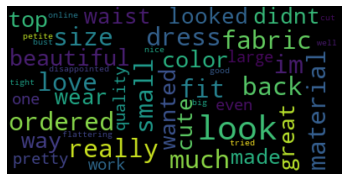

In [175]:
wordcloud = WordCloud().generate(' '.join(norec_dress['words']))

# # Display the generated image:

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(norec_dress['words']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Blouses

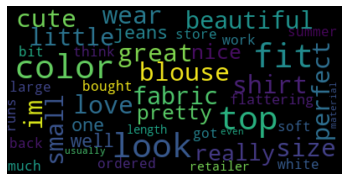

In [176]:
wordcloud = WordCloud().generate(' '.join(rec_blouse['words']))

# # Display the generated image:

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(rec_blouse['words']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

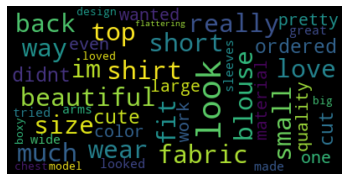

In [177]:
wordcloud = WordCloud().generate(' '.join(norec_blouse['words']))

# # Display the generated image:

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(norec_blouse['words']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Knits

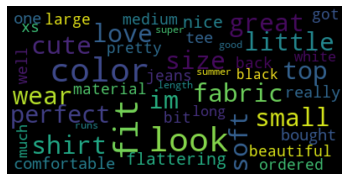

In [178]:
wordcloud = WordCloud().generate(' '.join(rec_Knit['words']))

# # Display the generated image:

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(rec_Knit['words']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

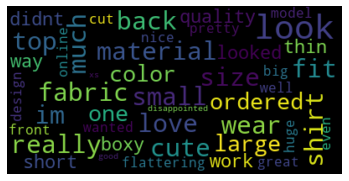

In [179]:
wordcloud = WordCloud().generate(' '.join(norec_Knit['words']))

# # Display the generated image:

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(norec_Knit['words']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## **Analysis**

- The recommended reviews have the word 'love' and 'great' in the top 5 words and the word 'perfect' in the top 50 words. On the other hand, the not recommended reviews have 'like' as the second most frequent word and it's followed by the word 'fabric' and 'fit'.
- Customers have recommended the dresses which have a flattering fit and are comfortable.
- Customers have recommended the knits which have soft fabric and flattering and comfortable fit.
- The words 'fabric', 'fit', and 'size' are top ranked words for both classes of the three items. This is because customers cannot wear clothes to check the features before purchasing.  

# **Modeling**

We are going to build four models and choose the best model based on metrics of model accuracy and overfitting.

- Simple RNN Model
- LSTM Model
- GRU Model
- Pre-trained Model with GLOVE

## **Preparation for modeling**

### Tokenizer
The tokenizer takes a given sentence and parses it into a list with individual words separated by a comma. This makes it easy for us to do some feature engineering later on in the notebook.

In [180]:
# Tokenize, pad and prepare training and validation data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
validation_samples = 5641  # We will be validating on 1000 samples
max_words = 20000 

tokenizer = Tokenizer(num_words=max_words)

# fit_on_texts means it learns the indices of the words
tokenizer.fit_on_texts(df['new_text'])

# the sequences are comprised of those indices
sequences = tokenizer.texts_to_sequences(df['new_text'])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# in case of low word counts, we need to pad sequences
# so that they are uniform length
data = pad_sequences(sequences, maxlen=maxlen)

# our labels, which were previously stored as a list [],
# are now converted to a numpy array for modeling
labels = np.asarray(df['Recommended IND'])
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 20533 unique tokens.
Shape of data tensor: (22641, 100)
Shape of label tensor: (22641,)


## **Train and Validation Partition**


In [181]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

training_samples = 17000  # We will be training on 3000 samples

x_train = data[:training_samples] # from 0 to training samples
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [182]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(17000, 100) (17000,)
(5641, 100) (5641,)


In [183]:
# import modules for modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, Flatten, Dense, LSTM, Conv1D, MaxPooling1D, Dropout, Bidirectional

## **Simple RNN Model**

In [184]:
# define model
model = Sequential()
model.add(Embedding(max_words, 32, input_length=maxlen))
model.add(Dropout(0.3))
model.add(SimpleRNN(64))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=850,
                    validation_data=(x_val, y_val))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           640000    
                                                                 
 dropout (Dropout)           (None, 100, 32)           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                6208      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 646,273
Trainable params: 646,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
20/20 [==============================] 

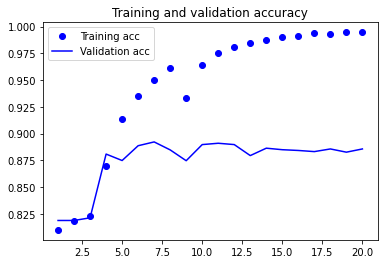

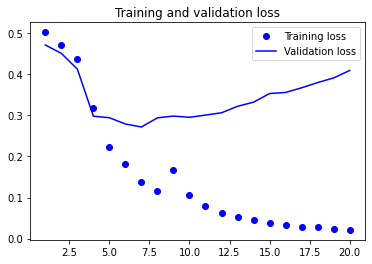

In [185]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [186]:
# classification report and confusion matrix
from sklearn.metrics import confusion_matrix

# if we don't round to a whole number (0 or 1), the confusion matrix won't work!
preds1 = np.round(model.predict(x_val),0)

In [187]:
# confusion matrix 
matrix = confusion_matrix(y_val, preds1)
matrix

array([[ 591,  431],
       [ 214, 4405]])

In [188]:
# classification report 
from sklearn.metrics import classification_report

# more detail on how well things were predicted
print(classification_report(y_val, preds1))

              precision    recall  f1-score   support

           0       0.73      0.58      0.65      1022
           1       0.91      0.95      0.93      4619

    accuracy                           0.89      5641
   macro avg       0.82      0.77      0.79      5641
weighted avg       0.88      0.89      0.88      5641



## **LSTM Model**

In [189]:
# define model
model = Sequential()
model.add(Embedding(max_words, 64, input_length=maxlen))
model.add(LSTM(32, dropout=0.1, recurrent_dropout=0.2))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=850,
                    validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           1280000   
                                                                 
 lstm (LSTM)                 (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,292,961
Trainable params: 1,292,961
No

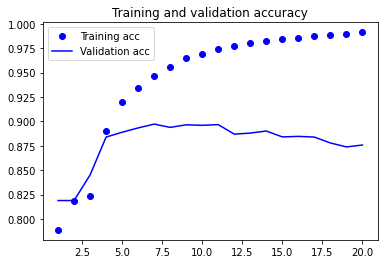

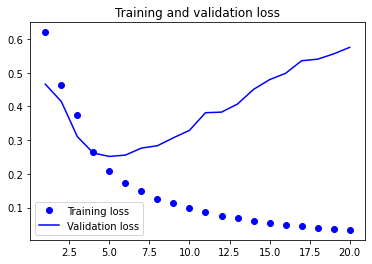

In [190]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [191]:
# classification report and confusion matrix

# if we don't round to a whole number (0 or 1), the confusion matrix won't work!
preds2 = np.round(model.predict(x_val),0)

In [192]:
# confusion matrix 
matrix = confusion_matrix(y_val, preds2)
matrix

array([[ 673,  349],
       [ 352, 4267]])

In [193]:
# classification report 

# more detail on how well things were predicted
print(classification_report(y_val, preds2))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      1022
           1       0.92      0.92      0.92      4619

    accuracy                           0.88      5641
   macro avg       0.79      0.79      0.79      5641
weighted avg       0.88      0.88      0.88      5641



## **GRU Model**

In [194]:
# define model
model = Sequential()
model.add(Embedding(max_words, 64, input_length=maxlen))
model.add(GRU(32, dropout=0.1, recurrent_dropout=0.2))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=850,
                    validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 64)           1280000   
                                                                 
 gru (GRU)                   (None, 32)                9408      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,289,953
Trainable params: 1,289,953
No

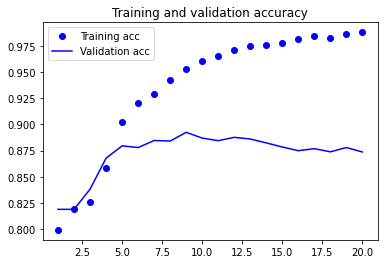

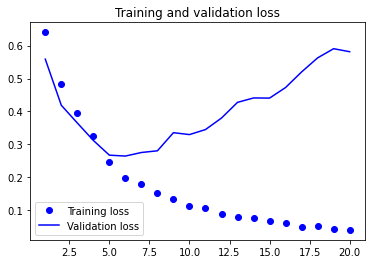

In [195]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [196]:
# classification report and confusion matrix
preds3 = np.round(model.predict(x_val),0)

In [197]:
# confusion matrix 
matrix = confusion_matrix(y_val, preds3)
matrix

array([[ 634,  388],
       [ 325, 4294]])

In [ ]:
# classification report 
print(classification_report(y_val, preds3))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62      1049
           1       0.91      0.94      0.92      4592

    accuracy                           0.87      5641
   macro avg       0.79      0.75      0.77      5641
weighted avg       0.86      0.87      0.86      5641



## **Pre-trained Model with GROVE**

We are going to use glove.6B downloaded from https://nlp.stanford.edu/projects/glove/. It contains 100-dimensional embedding vectors for 400,000 words.

### Pre-process the embeddings

Let's parse the un-zipped file (it's a `txt` file) to build an index mapping words (as strings) to their vector representation (as number 
vectors).

In [ ]:
import os

# this loads very quickly

# there is a slash at the end!
glove_dir = '/content/drive/MyDrive/DeepLearning/RNN/M5.1/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


Now let's build an embedding matrix that we will be able to load into an Embedding layer. It must be a matrix of shape (max_words, embedding_dim), where each entry i contains the embedding_dim-dimensional vector for the word of index i in our reference word index (built during tokenization).

In [ ]:
embedding_dim = 100 # this is the dimension of the file we imported

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [ ]:
# define model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(GRU(64, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          2000000   
                                                                 
 gru_3 (GRU)                 (None, 64)                31872     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,036,097
Trainable params: 2,036,097
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False # freezes everything

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=850,
                    validation_data=(x_val, y_val))

# model.save_weights('pre_trained_glove_model.h5')

Epoch 1/20
20/20 [==============================] - 27s 1s/step - loss: 0.4839 - acc: 0.8185 - val_loss: 0.4537 - val_acc: 0.8142
Epoch 2/20
20/20 [==============================] - 23s 1s/step - loss: 0.4355 - acc: 0.8234 - val_loss: 0.4303 - val_acc: 0.8282
Epoch 3/20
20/20 [==============================] - 22s 1s/step - loss: 0.4104 - acc: 0.8355 - val_loss: 0.4000 - val_acc: 0.8330
Epoch 4/20
20/20 [==============================] - 23s 1s/step - loss: 0.3618 - acc: 0.8433 - val_loss: 0.3320 - val_acc: 0.8463
Epoch 5/20
20/20 [==============================] - 23s 1s/step - loss: 0.3134 - acc: 0.8616 - val_loss: 0.3038 - val_acc: 0.8667
Epoch 6/20
20/20 [==============================] - 22s 1s/step - loss: 0.2927 - acc: 0.8723 - val_loss: 0.2919 - val_acc: 0.8743
Epoch 7/20
20/20 [==============================] - 23s 1s/step - loss: 0.2769 - acc: 0.8785 - val_loss: 0.2766 - val_acc: 0.8814
Epoch 8/20
20/20 [==============================] - 23s 1s/step - loss: 0.2667 - acc: 0.88

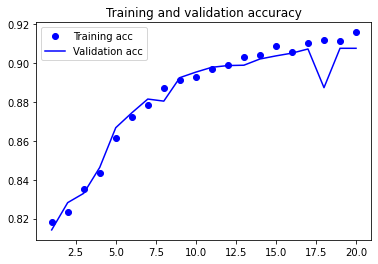

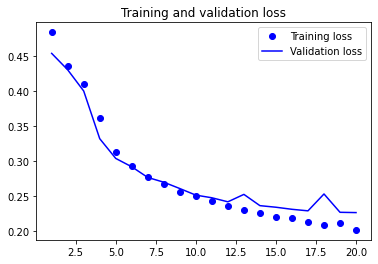

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# classification report and confusion matrix

preds4 = np.round(model.predict(x_val),0)

In [ ]:
# confusion matrix 
matrix = confusion_matrix(y_val, preds4)
matrix

array([[ 757,  292],
       [ 230, 4362]])

In [ ]:
# classification report

print(classification_report(y_val, preds4))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1049
           1       0.94      0.95      0.94      4592

    accuracy                           0.91      5641
   macro avg       0.85      0.84      0.84      5641
weighted avg       0.91      0.91      0.91      5641



# **Conclusion**

- In this problem, precision is a good evaluation metric to use because the company will sell a limited number of clothes due to resource limit so the cost of a false positive is high.
- Initially, the simple RNN model was built and it has got precision 0.82 and it was overfitting even though dropout was used so we tried to build a LSTM model and a GRU model to improve accuracy of a model. However, they also don't have good results of model accuracy and they are overfitting.
- We built a pre-trained model by loading embedding vectors from a pre-computed embedding space known to be highly structured and to exhibit useful properties that capture generic aspects of language structure. The model has 0.85 as a precision and the precisions of the train and validation are consistent.
- The pre-trained is our best model. By using this model, the company can predict whether a particular product would be recommended or not recommended by customers so that it can decide whether or not to sell the product.
- The reviews of recommended products contain the words 'love', 'great', and 'perfect', while not recommended reviews less or no have the words.
- Due to the characteristics of the e-commerce industry, reviews from both classes contain the words 'fit', 'size' and 'fabric' a lot.  Since customers cannot wear clothes prior to purchase, the company needs to improve UI to clearly show the information of the three features.